<center><h2> Numerical Harmonic Oscillator Wave Functions</h2> </center>
 
""" From "COMPUTATIONAL PHYSICS" & "COMPUTER PROBLEMS in PHYSICS"
    by RH Landau, MJ Paez, and CC Bordeianu (deceased)
    Copyright R Landau, Oregon State Unv, MJ Paez, Univ Antioquia, 
    C Bordeianu, Univ Bucharest, 2020. 
    Please respect copyright & acknowledge our work."""
    
HO wave functions via ODE solver

<IPython.core.display.Javascript object>


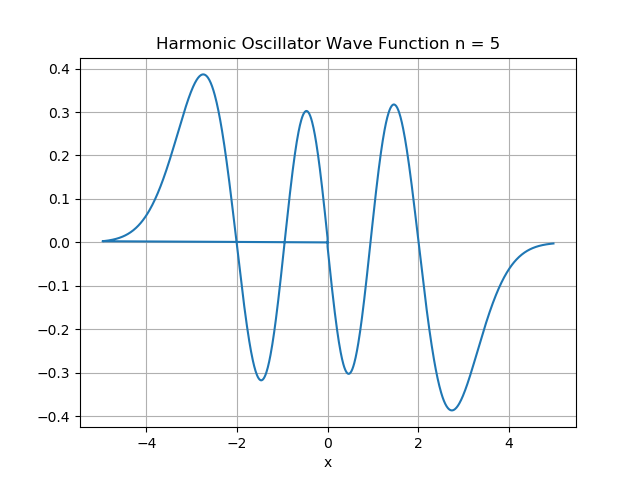

Text(0.5, 0, 'x')

In [2]:
# HOnumeric.ipynb: HO wave functions via ODE solver

%matplotlib notebook
import numpy as np
import matplotlib.pylab as plt
# from rk4Algor import rk4Algor                                   

n = 5         #  Quantum number n = npr + L + 1 = integer > 0                    
xx = np.zeros((1000),float)            # x values for plot
yy = np.zeros((1000),float)            # wave function values
fvector = np.zeros(2)                  # force function f
y = np.zeros(2)       

def f(x,y):                          # Force function for HO                     
    fvector[0] = y[1]
    fvector[1] = -(2*n+1-x**2)*y[0]
    return fvector
   
if (n%2 == 0):   y[0] = 1.;   y[1] = 0.   # Even parity
else:            y[0] = 0;    y[1] = -1.   # Odd parity     

xRight = 5
f(0,y)     # force function starting value
dx = 0.01

def rk4Algor(t, h, N, y, f):
    k1 = np.zeros(N); k2=np.zeros(N); k3=np.zeros(N); k4=np.zeros(N);
    k1 = h*f(t,y)                             
    k2 = h*f(t+h/2.,y+k1/2.)
    k3 = h*f(t+h/2.,y+k2/2.)
    k4 = h*f(t+h,y+k3)
    y = y+(k1+2*(k2+k3)+k4)/6.
    return y

i = 0
for x in np.arange(0,xRight,dx):    # Compute WF 0-> xRight, step dr
    xx[i+500] = x
    y = rk4Algor(x, dx, 2, y, f) 
    yy[i+500] = y[0]   #  
    i = i+1       
          
i = 0         # Now reflect
for x in np.arange(-dx,-xRight,-dx):    
    xx[499-i] =  -xx[i+499]
    if (n%2 == 0): yy[499-i] =  yy[i+499]    # Even parity
    else:          yy[499-i] = -yy[i+499]    # Ddd parity
    i = i + 1
    
plt.figure()
plt.plot(xx,yy) 
plt.grid()
plt.title('Harmonic Oscillator Wave Function n = 5')  
plt.xlabel('x')